In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_image = x_train[0]

In [6]:
single_image.shape

(28, 28)

In [7]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

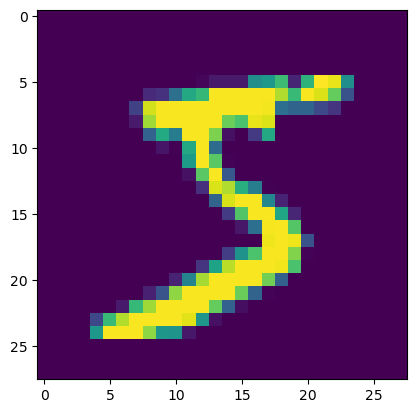

In [8]:
plt.imshow(single_image)

In [9]:
from tensorflow .keras.utils import to_categorical

In [10]:
y_train.shape

(60000,)

In [11]:
y_example = to_categorical(y_train)

In [12]:
y_example.shape

(60000, 10)

In [13]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [14]:
y_cat_test = to_categorical(y_test,num_classes=10)

In [15]:
y_cat_train = to_categorical(y_train,num_classes=10)

In [16]:
single_image.max()

255

In [17]:
single_image.min()

0

In [18]:
x_train = x_train/255

In [19]:
x_test = x_test/255

In [20]:
scaled_image = x_train[0]

In [21]:
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [22]:
scaled_image.max()

1.0

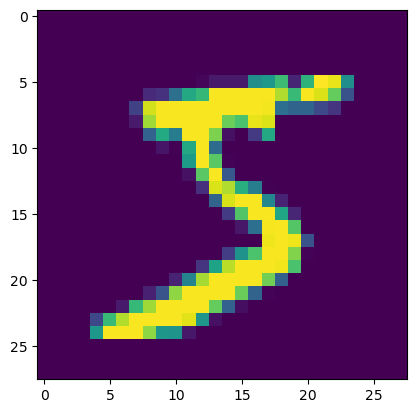

In [23]:
plt.imshow(scaled_image)

In [24]:
#x_train = x_train.reshape(6000,28,28,1)
x_train = np.expand_dims(x_train,axis=3)

In [25]:
x_train.shape

(60000, 28, 28, 1)

In [26]:
x_test = np.expand_dims(x_test,axis=3)

In [27]:
x_test.shape

(10000, 28, 28, 1)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [29]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
early_stopping = EarlyStopping(monitor='val_loss',patience=1)

In [33]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks = [early_stopping])

Epoch 1/10
1875/1875 [==============================] - 143s 75ms/step - loss: 0.1317 - accuracy: 0.9604 - val_loss: 0.0585 - val_accuracy: 0.9807
Epoch 2/10
1875/1875 [==============================] - 124s 66ms/step - loss: 0.0416 - accuracy: 0.9869 - val_loss: 0.0459 - val_accuracy: 0.9843
Epoch 3/10
1875/1875 [==============================] - 130s 69ms/step - loss: 0.0227 - accuracy: 0.9927 - val_loss: 0.0484 - val_accuracy: 0.9843


In [34]:
metrics = pd.DataFrame(model.history.history)

In [35]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.131701,0.960383,0.058489,0.9807
1,0.041570,0.986900,0.045943,0.9843
2,0.022737,0.992717,0.048428,0.9843


<AxesSubplot:>

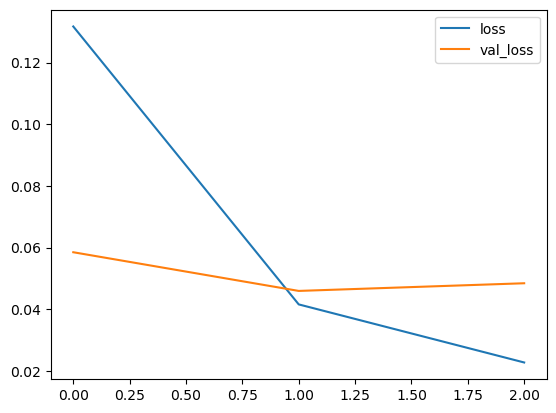

In [36]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

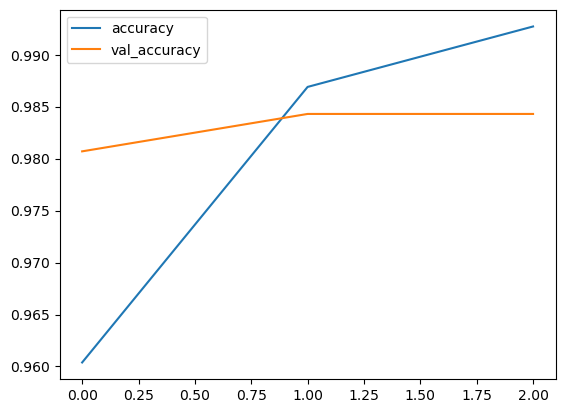

In [37]:
metrics[['accuracy','val_accuracy']].plot()

In [38]:
model.metrics_names

['loss', 'accuracy']

In [39]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.048427969217300415, 0.9843000173568726]

In [40]:
from sklearn.metrics import classification_report,confusion_matrix

In [67]:
predictions = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 2s 6ms/step


In [68]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.98      0.98       892
           6       0.99      0.97      0.98       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



<AxesSubplot:>

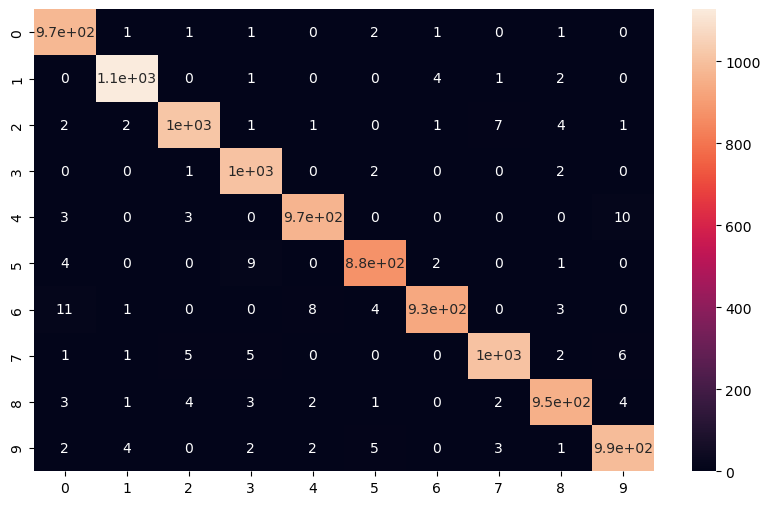

In [69]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [98]:
my_number = x_test[5]

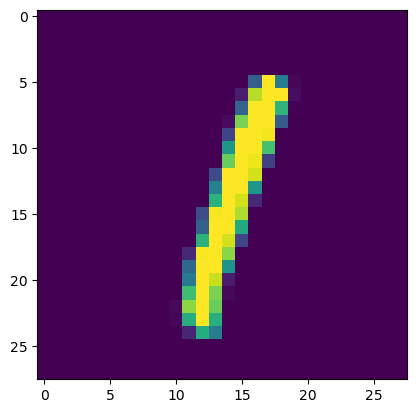

In [99]:
plt.imshow(my_number.reshape(28,28))

In [100]:
predictions = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 2s 6ms/step


In [101]:
result = np.round(model.predict(my_number.reshape(1,28,28,1)))

1/1 [==============================] - 0s 25ms/step


In [102]:
result

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [103]:
results= np.where(result != 0)

In [104]:
results[-1]

array([1], dtype=int64)